In [2]:
import pandas as pd
import numpy as np

## Chapter 4 - Exploring file formats

In [3]:
import rdkit
from rdkit import Chem

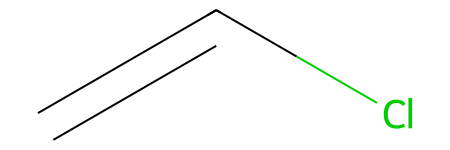

In [3]:
chloroethan_smi = "ClC=C"
chloroethane_mol = Chem.MolFromSmiles(chloroethan_smi)
chloroethane_mol

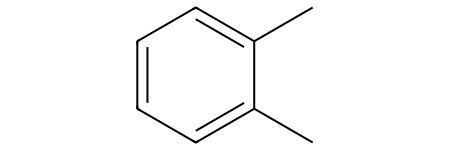

In [4]:
Chem.MolFromSmiles("Cc1ccccc1C")

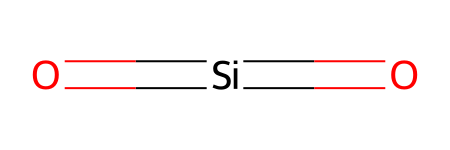

In [4]:
# Advanced smiles
Chem.MolFromSmiles("[Si](=O)=O")

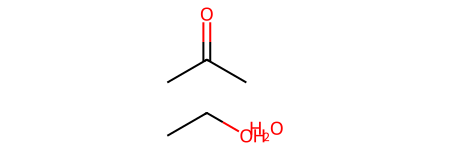

In [5]:
Chem.MolFromSmiles("CCO.O.CC(=O)C")

### SMARTS

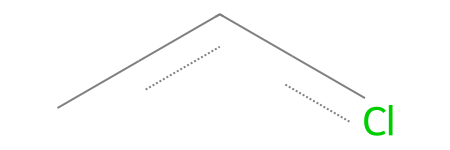

In [6]:
# SMARTS format
smarts = "CCCl"
Chem.MolFromSmarts(smarts) # bonds unspecified - smarts need to show the bonds

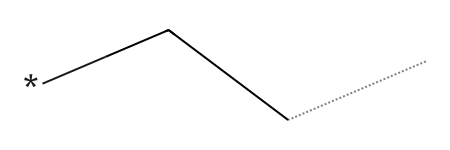

In [7]:
smarts = "[C;O]~[C]-[CX2]-[*]"
Chem.MolFromSmarts(smarts)

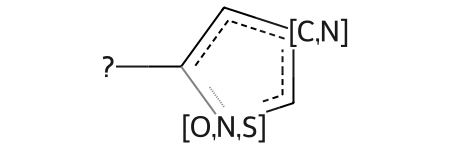

In [8]:
smarts = "[#8,#7,#16]1:[#6]:[#6,#7]:[#6]:[#6]1-[A]"
Chem.MolFromSmarts(smarts)

## What is SDF?
Structure data file (SDF) is a complex format for representation of chemical structure for multiple compounds. Consists of mol blocks that can also function as separate MDL Molfiles (.mol). The molblocks themselves consist of the following parts

- header block : e.g. 2-aminothiophen
- atom block
- bond block
- (mol) property fields


Softwares to create SDF : Marvin chemaxon from chembl

*Refer to COX2 SDF file for example in assets folder*

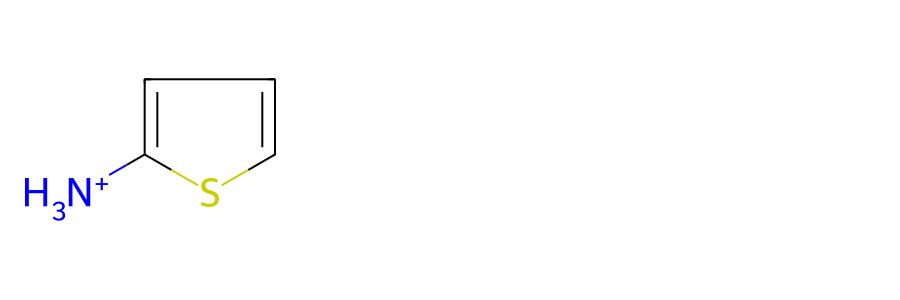

In [9]:
# sdf
# https://www.ebi.ac.uk/chembl/
sdf_file = "assets/marvinjs_untitled_file1.sdf"
supplier = Chem.SDMolSupplier(sdf_file)
molecules = [mol for mol in supplier if mol is not None]
Chem.Draw.MolsToGridImage(molecules[:5], molsPerRow=3, subImgSize=(300, 300))

### Visualise molecules in pandastools from SDF

,ID,Mol
0,,

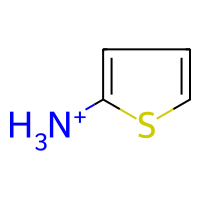

In [6]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools

# Load molecules from SDF file
sdf_file = "assets/marvinjs_untitled_file1.sdf"  # Replace with your file path

pd_sdf = PandasTools.LoadSDF(sdf_file, molColName="Mol")
pd_sdf



In [7]:
pd_sdf.iloc[0]

ID                                                  
Mol    <rdkit.Chem.rdchem.Mol object at 0x325647e60>
Name: 0, dtype: object

### Syntax for pandas sdf
- pd_sdf.loc[~(boolean)] but this format does not visualise the mol file.
- ~ is not, we cannot use !
- | is or

# Chapter 5 - Chemical File conversion methods

## From SMILES

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import SVG, display
from rdkit.Chem.Draw import rdMolDraw2D
from io import BytesIO
def smiles_to_mol(smiles):
    """
    Convert a SMILES string to an RDKit Mol object.

    Parameters:
    - smiles (str): SMILES string representing the molecule.

    Returns:
    - Mol object or None if invalid SMILES.
    """
    return Chem.MolFromSmiles(smiles)
def mol_to_svg(mol, size=(200, 200)):
    """
    Convert an RDKit Mol object to an SVG image.

    Parameters:
    - mol (Mol): RDKit Mol object.
    - size (tuple): Width and height of the image in pixels.

    Returns:
    - SVG image as a string or a placeholder SVG if molecule is None.
    """
    if mol is not None:
        drawer = rdMolDraw2D.MolDraw2DSVG(size[0], size[1])
        drawer.DrawMolecule(mol)
        drawer.FinishDrawing()
        svg = drawer.GetDrawingText().replace('svg:', '')  # Clean up SVG namespace
        return svg
    else:
        # Placeholder SVG for invalid molecules
        placeholder_svg = """
        <svg width="200" height="200" xmlns="http://www.w3.org/2000/svg">
          <rect width="100%" height="100%" fill="#f0f0f0"/>
          <text x="50%" y="50%" dominant-baseline="middle" text-anchor="middle" fill="red" font-size="20">Invalid</text>
        </svg>
        """
        return placeholder_svg
# Sample list of SMILES strings
smiles_list = [
    "CCO",             # Ethanol
    "CC(=O)O",         # Acetic acid
    "c1ccccc1",        # Benzene
    "C1=CC=CN=C1",     # Pyridine
    # "invalid_smiles"   # Invalid SMILES for demonstration
]

# Initialize a list to store data
data = []

for smi in smiles_list:
    mol = smiles_to_mol(smi)
    svg = mol_to_svg(mol)
    data.append({'SMILES': smi, 'Molecule': SVG(svg)})

# Create a Pandas DataFrame
df = pd.DataFrame(data)

from rdkit.Chem import Descriptors

# Function to calculate molecular weight
def get_mol_wt(mol):
    return Descriptors.MolWt(mol) if mol else None

# Update data with molecular weight
data = []

for smi in smiles_list:
    mol = smiles_to_mol(smi)
    svg = mol_to_svg(mol)
    mol_wt = get_mol_wt(mol)
    data.append({'SMILES': smi, 'Molecule': SVG(svg), 'Molecular Weight': mol_wt})

# Create DataFrame
df = pd.DataFrame(data)


df

,SMILES,Molecule,Molecular Weight
0,CCO,<IPython.core.display.SVG object>,46.069
1,CC(=O)O,<IPython.core.display.SVG object>,60.052
2,c1ccccc1,<IPython.core.display.SVG object>,78.114
3,C1=CC=CN=C1,<IPython.core.display.SVG object>,79.102


## What is PDB?

Technology to get the structure:
- X ray crystolography
- NMR spectroscopy
- electron spectroscopy
The Protein Data Bank (PDB) is the most common format for storing the structures of the macromolecules. Just like SDF, it can contain structure and data of multiple molecules, with both high (e.g. polynucleotide) or low (e. g. water) molecular mass. The major source of pdb files is the Protein Data Bank website (https://www.rcsb.org/)

The columns are: overall type, atom number, atom type,
residue type, molecule ID.
The next three columns are the occupancy, temperature factor, and the element name, respectively.


Q 1: What is the primary purpose of chemical file formats in cheminformatics?
Your answer : To store and share chemical structure information ✅

Correct answer : To store and share chemical structure information

Q 2: Which is NOT a common chemical file format?
Your answer : PDF ✅

Correct answer : PDF

Q 3: What does SMILES stand for in cheminformatics?
Your answer : Simplified Molecular Input Line Entry System ✅

Correct answer : Simplified Molecular Input Line Entry System

Q 4: What type of information does a SMILES string represent?
Your answer : The molecular structure in a linear text format ✅

Correct answer : The molecular structure in a linear text format

Q 5: Which feature is typically included in advanced SMILES strings?
Your answer : Stereochemistry information ✅

Correct answer : Stereochemistry information

Q 6: What distinguishes advanced SMILES from basic SMILES format?
Your answer : Representation of complex molecular structures and isomers ✅

Correct answer : Representation of complex molecular structures and isomers

Q 7: What is SMARTS primarily used for in cheminformatics?
Your answer : To define substructure search patterns ✅

Correct answer : To define substructure search patterns

Q 8: How does SMARTS differ from SMILES?
Your answer : SMARTS allows for logical expressions in pattern matching ✅

Correct answer : SMARTS allows for logical expressions in pattern matching

Q 9: What is a key challenge in using SMARTS format?
Your answer : Complexity in representing versatile chemical patterns ✅

Correct answer : Complexity in representing versatile chemical patterns

Q 10: What is a unique feature of the SDF format?
Your answer : It allows for storing multiple molecules in one file ✅

Correct answer : It allows for storing multiple molecules in one file

Q 11: In cheminformatics, what is the PDB format mainly used for?
Your answer : To represent 3D structures of macromolecules ✅

Correct answer : To represent 3D structures of macromolecules

### How to add col to Pandas sdf

,ID,Mol,smiles
0,,,[NH3+]c1cccs1

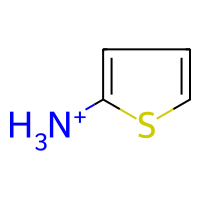

In [8]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools

# Load molecules from SDF file
sdf_file = "assets/marvinjs_untitled_file1.sdf"  # Replace with your file path

pd_sdf = PandasTools.LoadSDF(sdf_file, molColName="Mol")

smi_list = []
for mol in pd_sdf['Mol']:
    smi_list.append(Chem.MolToSmiles(mol))
pd_sdf['smiles'] = smi_list
pd_sdf


### can export to csv
- try to delete a col
- export to csv

*Note that when we try to export using data warrior or python to csv, it does not make sense for a mol to be in csv, so the file exported is gibberish

In [10]:
# del(pd_sdf['Mol'])
# pd.to_csv(pd_sdf, path)


## Chapter 5 quiz
Q 1: What is the main purpose of file conversions in the context of chemistry?
Your answer : To convert chemical data into a different format ✅

Correct answer : To convert chemical data into a different format

Q 2: What does the `rdkit.Chem.PandasTools.WriteSDF` function do?
Your answer : Write an SD file for molecules in a Pandas DataFrame ✅

Correct answer : Write an SD file for molecules in a Pandas DataFrame